# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

What are the files we are analyzing?

In [2]:
all_files = glob("cali_s2/*.cali")
print(all_files)

['cali_s2/s2-t32-v65536.cali', 'cali_s2/s2-t128-v262144.cali', 'cali_s2/s2-t64-v65536.cali', 'cali_s2/s2-t32-v262144.cali', 'cali_s2/s2-t128-v65536.cali', 'cali_s2/s2-t16-v262144.cali', 'cali_s2/s2-t64-v262144.cali', 'cali_s2/s2-t256-v65536.cali', 'cali_s2/s2-t16-v65536.cali', 'cali_s2/s2-t256-v262144.cali']


# Read n files (n = 33)

In [3]:
tk = th.Thicket.from_caliperreader(all_files)

What files?

In [4]:
tk.profile_mapping

OrderedDict([(468752293, 'cali_s2/s2-t64-v65536.cali'),
             (642661600, 'cali_s2/s2-t128-v65536.cali'),
             (679717598, 'cali_s2/s2-t32-v262144.cali'),
             (799515725, 'cali_s2/s2-t256-v262144.cali'),
             (1022652626, 'cali_s2/s2-t256-v65536.cali'),
             (1404577234, 'cali_s2/s2-t16-v65536.cali'),
             (2558947825, 'cali_s2/s2-t64-v262144.cali'),
             (3326627877, 'cali_s2/s2-t32-v65536.cali'),
             (3771216952, 'cali_s2/s2-t16-v262144.cali'),
             (4105000209, 'cali_s2/s2-t128-v262144.cali')])

Call tree

In [5]:
tk.statsframe.dataframe["test"] = -1
print(tk.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

-1.000 main
├─ -1.000 comm
│  └─ -1.000 comm_large
│     └─ -1.000 cudaMemcpy
├─ -1.000 comp
│  └─ -1.000 comp_large
├─ -1.000 correctness_check
└─ -1.000 data_init

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Performance data

In [6]:
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              468752293     1   
                                                  642661600     1   
                                                  679717598     1   
                                                  799515725     1   
                                                  1022652626    1   
                                                  1404577234    1   
                                                  2558947825    1   
                                                  3326627877    1   
                                                  3771216952    1   
                                                  4105000209    1   
{'name': 'comm', 'type': 'function'}              468752293     3   
                                                  642661600     3   
                                                  679717598     3   
                                                  799515725     3   
                                                  1022652626    3   
                                                  1404577234    3   
                                                  2558947825    3   
                                                  3326627877    3   
                                                  3771216952    3   
                                                  4105000209    3   
{'name': 'comm_large', 'type': 'function'}        468752293     4   
                                                  642661600     4   
                                                  679717598     4   
                                                  799515725     4   
                                                  1022652626    4   
                                                  1404577234    4   
                                                  2558947825    4   
                                                  3326627877    4   
                                                  3771216952    4   
                                                  4105000209    4   
{'name': 'cudaMemcpy', 'type': 'function'}        468752293     5   
                                                  642661600     5   
                                                  679717598     5   
                                                  799515725     5   
                                                  1022652626    5   
                                                  1404577234    5   
                                                  2558947825    5   
                                                  3326627877    5   
                                                  3771216952    5   
                                                  4105000209    5   
{'name': 'comp', 'type': 'function'}              468752293     6   
                                                  642661600     6   
                                                  679717598     6   
                                                  799515725     6   
                                                  1022652626    6   
                                                  1404577234    6   
                                                  2558947825    6   
                                                  3326627877    6   
                                                  3771216952    6   
                                                  4105000209    6   
{'name': 'comp_large', 'type': 'function'}        468752293     7   
                                                  642661600     7   
                                                  679717598     7   
                                                  799515725     7   
                                                  1022652626    7   
                                                  1404577234    7   
                                                  2558947825

Metadata

In [7]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
468752293,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t64-v65536.cali,1700105285,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 64, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,65536,1%perturbed,0,64,1024,20,"All 3, Online, AI, and Handwritten"
642661600,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t128-v65536.cali,1700105299,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 128, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,65536,1%perturbed,0,128,512,20,"All 3, Online, AI, and Handwritten"
679717598,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t32-v262144.cali,1700105285,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 262144, 32, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,262144,1%perturbed,0,32,8192,20,"All 3, Online, AI, and Handwritten"
799515725,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t256-v262144.cali,1700105319,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 262144, 256, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,262144,1%perturbed,0,256,1024,20,"All 3, Online, AI, and Handwritten"
1022652626,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t256-v65536.cali,1700105319,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 256, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,65536,1%perturbed,0,256,256,20,"All 3, Online, AI, and Handwritten"
1404577234,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t16-v65536.cali,1700105260,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 16, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,65536,1%perturbed,0,16,4096,20,"All 3, Online, AI, and Handwritten"
2558947825,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t64-v262144.cali,1700105285,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 262144, 64, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,262144,1%perturbed,0,64,4096,20,"All 3, Online, AI, and Handwritten"
3326627877,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t32-v65536.cali,1700105260,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 32, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,65536,1%perturbed,0,32,2048,20,"All 3, Online, AI, and Handwritten"
3771216952,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t16-v262144.cali,1700105260,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 262144, 16, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,262144,1%perturbed,0,16,16384,20,"All 3, Online, AI, and Handwritten"


# Goal

programmatically analyze the data by graphing it

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [8]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
468752293,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t64-v65536.cali,1700105285,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 64, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,65536,1%perturbed,0,64,1024,20,"All 3, Online, AI, and Handwritten"
642661600,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t128-v65536.cali,1700105299,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 128, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,65536,1%perturbed,0,128,512,20,"All 3, Online, AI, and Handwritten"
679717598,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t32-v262144.cali,1700105285,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 262144, 32, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,262144,1%perturbed,0,32,8192,20,"All 3, Online, AI, and Handwritten"
799515725,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t256-v262144.cali,1700105319,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 262144, 256, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,262144,1%perturbed,0,256,1024,20,"All 3, Online, AI, and Handwritten"
1022652626,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t256-v65536.cali,1700105319,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 256, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,65536,1%perturbed,0,256,256,20,"All 3, Online, AI, and Handwritten"
1404577234,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t16-v65536.cali,1700105260,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 16, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,65536,1%perturbed,0,16,4096,20,"All 3, Online, AI, and Handwritten"
2558947825,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t64-v262144.cali,1700105285,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 262144, 64, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,262144,1%perturbed,0,64,4096,20,"All 3, Online, AI, and Handwritten"
3326627877,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t32-v65536.cali,1700105260,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 65536, 32, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,65536,1%perturbed,0,32,2048,20,"All 3, Online, AI, and Handwritten"
3771216952,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,s2-t16-v262144.cali,1700105260,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 262144, 16, 2]",g,Bubble/Odd-Even Sort,CUDA,float,4,262144,1%perturbed,0,16,16384,20,"All 3, Online, AI, and Handwritten"


In [9]:
gb = tk.groupby("InputSize")

2  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b7687ae3310>, 262144: <thicket.thicket.Thicket object at 0x2b7687b9bd60>}


Compose these 3 groups column-wise to get a holistic view of the data

In [10]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [11]:
ctk.dataframe

65536  \
                                                                nid   
node                                              num_threads         
{'name': 'main', 'type': 'function'}              16              1   
                                                  32              1   
                                                  64              1   
                                                  128             1   
                                                  256             1   
{'name': 'comm', 'type': 'function'}              16              3   
                                                  32              3   
                                                  64              3   
                                                  128             3   
                                                  256             3   
{'name': 'comm_large', 'type': 'function'}        16              4   
                                                  32              4   
                                                  64              4   
                                                  128             4   
                                                  256             4   
{'name': 'cudaMemcpy', 'type': 'function'}        16              5   
                                                  32              5   
                                                  64              5   
                                                  128             5   
                                                  256             5   
{'name': 'comp', 'type': 'function'}              16              6   
                                                  32              6   
                                                  64              6   
                                                  128             6   
                                                  256             6   
{'name': 'comp_large', 'type': 'function'}        16              7   
                                                  32              7   
                                                  64              7   
                                                  128             7   
                                                  256             7   
{'name': 'correctness_check', 'type': 'function'} 16              8   
                                                  32              8   
                                                  64              8   
                                                  128             8   
                                                  256             8   
{'name': 'data_init', 'type': 'function'}         16              2   
                                                  32              2   
                                                  64              2   
                                                  128             2   
                                                  256             2   

                                                                              \
                                                                spot.channel   
node                                              num_threads                  
{'name': 'main', 'type': 'function'}              16           regionprofile   
                                                  32           regionprofile   
                                                  64           regionprofile   
                                                  128          regionprofile   
                                                  256          regionprofile   
{'name': 'comm', 'type': 'function'}              16           regionprofile   
                                                  32           regionprofile   
                                                  64           regionprofile   
                                                  128          regionprofile   
                                                

In [12]:
ctk.metadata

65536   \
            cali.caliper.version   
num_threads                        
16                    2.11.0-dev   
32                    2.11.0-dev   
64                    2.11.0-dev   
128                   2.11.0-dev   
256                   2.11.0-dev   

                                                                \
                                                  spot.metrics   
num_threads                                                      
16           min#inclusive#sum#time.duration,max#inclusive#...   
32           min#inclusive#sum#time.duration,max#inclusive#...   
64           min#inclusive#sum#time.duration,max#inclusive#...   
128          min#inclusive#sum#time.duration,max#inclusive#...   
256          min#inclusive#sum#time.duration,max#inclusive#...   

                                                         \
            spot.timeseries.metrics spot.format.version   
num_threads                                               
16                                                    2   
32                                                    2   
64                                                    2   
128                                                   2   
256                                                   2   

                                                                  \
                        spot.options  spot.channels cali.channel   
num_threads                                                        
16           cuda.gputime,node.order  regionprofile         spot   
32           cuda.gputime,node.order  regionprofile         spot   
64           cuda.gputime,node.order  regionprofile         spot   
128          cuda.gputime,node.order  regionprofile         spot   
256          cuda.gputime,node.order  regionprofile         spot   

                                                                    \
            spot:cuda.gputime spot:node.order          spot:output   
num_threads                                                          
16                       true            true   s2-t16-v65536.cali   
32                       true            true   s2-t32-v65536.cali   
64                       true            true   s2-t64-v65536.cali   
128                      true            true  s2-t128-v65536.cali   
256                      true            true  s2-t256-v65536.cali   

                                                                            \
             launchdate                                          libraries   
num_threads                                                                  
16           1700105260  [/scratch/group/csce435-f23/Caliper/caliper/li...   
32           1700105260  [/scratch/group/csce435-f23/Caliper/caliper/li...   
64           1700105285  [/scratch/group/csce435-f23/Caliper/caliper/li...   
128          1700105299  [/scratch/group/csce435-f23/Caliper/caliper/li...   
256          1700105319  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                      \
                               cmdline cluster             Algorithm   
num_threads                                                            
16            [./bubble, 65536, 16, 2]       g  Bubble/Odd-Even Sort   
32            [./bubble, 65536, 32, 2]       g  Bubble/Odd-Even Sort   
64            [./bubble, 65536, 64, 2]       g  Bubble/Odd-Even Sort   
128          [./bubble, 65536, 128, 2]       g  Bubble/Odd-Even Sort   
256          [./bubble, 65536, 256, 2]       g  Bubble/Odd-Even Sort   

                                                                             \
            ProgrammingModel Datatype SizeOfDatatype InputSize    InputType   
num_threads                                                                   
16                      CUDA    float              4     65536  1%perturbed   
32                      CUDA    float              4     65536  1%perturbed   
64                      CUDA    

Perform pandas operations to get the table in a desirable format for plotting

In [13]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), \
                                                  (65536, "nid"), (65536, "spot.channel"), (65536, "Min time/rank"),(65536, "Max time/rank"),(65536, "Avg time/rank"),(65536, "Avg GPU time/rank"),(65536, "Min GPU time/rank"),(65536, "Max GPU time/rank"),(65536, "Total GPU time"),\
                                                  (262144, "nid"), (262144, "spot.channel"), (262144, "Min time/rank"), (262144, "Max time/rank"), (262144, "Avg time/rank"), (262144, "Avg GPU time/rank"), (262144, "Min GPU time/rank"), (262144, "Max GPU time/rank"), (262144, "Total GPU time"), \
                                                  #(1048576, "nid"), (1048576, "spot.channel"), (1048576, "Min time/rank"), (1048576, "Max time/rank"), (1048576, "Avg time/rank"), (1048576, "Avg GPU time/rank"), (1048576, "Min GPU time/rank"), (1048576, "Max GPU time/rank"), (1048576, "Total GPU time"),\
                                                  #(4194304, "nid"), (4194304, "spot.channel"), (4194304, "Min time/rank"), (4194304, "Max time/rank"), (4194304, "Avg time/rank"), (4194304, "Avg GPU time/rank"), (4194304, "Min GPU time/rank"), (4194304, "Max GPU time/rank"), (4194304, "Total GPU time"),\
                                                  #(16777216, "nid"), (16777216, "spot.channel"), (16777216, "Min time/rank"), (16777216, "Max time/rank"), (16777216, "Avg time/rank"), (16777216, "Avg GPU time/rank"), (16777216, "Min GPU time/rank"), (16777216, "Max GPU time/rank"), (16777216, "Total GPU time"),\
                                                  #(67108864, "nid"), (67108864, "spot.channel"), (67108864, "Min time/rank"), (67108864, "Max time/rank"), (67108864, "Avg time/rank"), (67108864, "Avg GPU time/rank"), (67108864, "Min GPU time/rank"), (67108864, "Max GPU time/rank"), (67108864, "Total GPU time")
                                                 ], axis=1)



In [14]:
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

In [15]:
# Drop "time" label as it is redundant
ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [16]:
ctk.dataframe

65536    262144
name              num_threads                    
main              16           1.179390  5.305749
                  32           1.077908  3.467915
                  64           1.064687  2.918416
                  128          1.047778  2.519630
                  256          0.811890  1.971930
comm              16           0.000345  0.001078
                  32           0.000311  0.001054
                  64           0.000299  0.001046
                  128          0.000324  0.001040
                  256          0.000312  0.001033
comm_large        16           0.000284  0.001021
                  32           0.000252  0.000991
                  64           0.000247  0.000984
                  128          0.000265  0.000978
                  256          0.000252  0.000974
cudaMemcpy        16           0.000249  0.000974
                  32           0.000221  0.000945
                  64           0.000216  0.000941
                  128          0.000231  0.000936
                  256          0.000220  0.000933
comp              16           0.600230  4.725029
                  32           0.495542  3.128087
                  64           0.468508  2.315493
                  128          0.456539  1.904135
                  256          0.471176  1.638883
comp_large        16           0.600196  4.724977
                  32           0.495507  3.128038
                  64           0.468472  2.315449
                  128          0.456500  1.904089
                  256          0.471143  1.638836
correctness_check 16           0.000429  0.001016
                  32           0.000401  0.001026
                  64           0.000442  0.000993
                  128          0.000459  0.000990
                  256          0.000427  0.000988
data_init         16           0.000337  0.001298
                  32           0.000320  0.001094
                  64           0.000433  0.001297
                  128          0.000341  0.001288
                  256          0.000298  0.001100

In [17]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [18]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [19]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [20]:
ctk.dataframe.loc["main"]

,65536,262144
num_threads,,
16,1.179390,5.305749
32,1.077908,3.467915
64,1.064687,2.918416
128,1.047778,2.519630
256,0.811890,1.971930


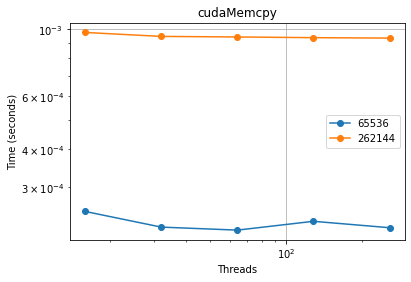

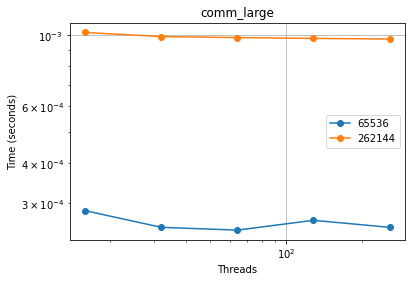

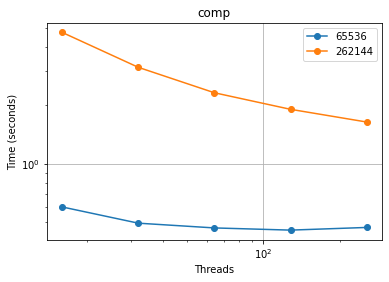

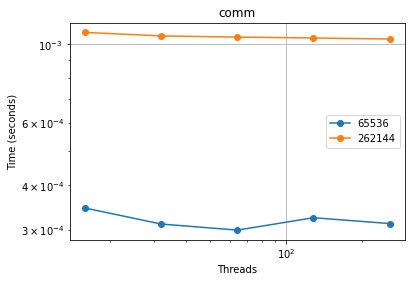

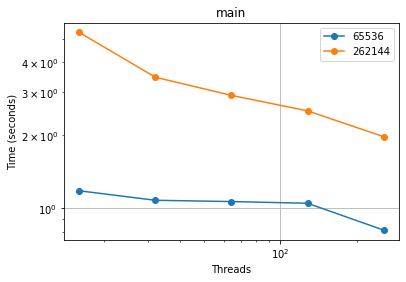

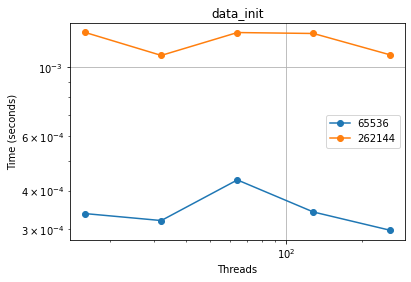

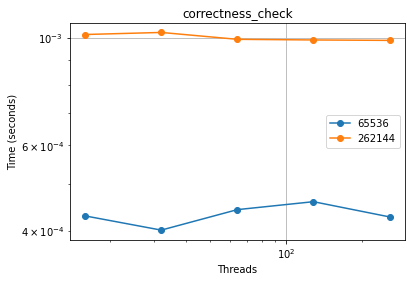

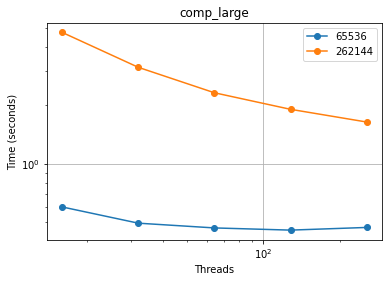

In [21]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

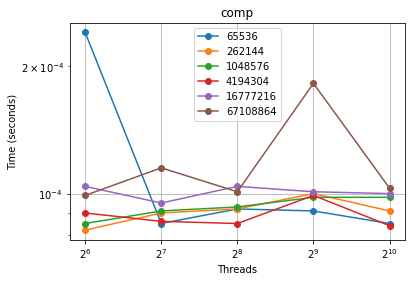

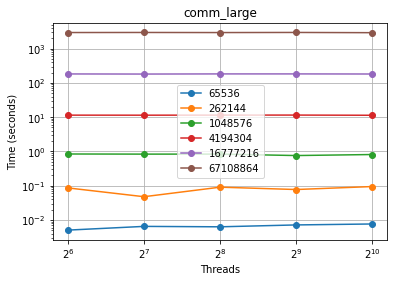

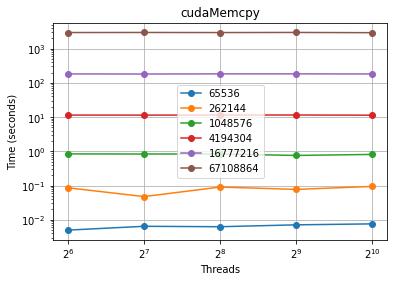

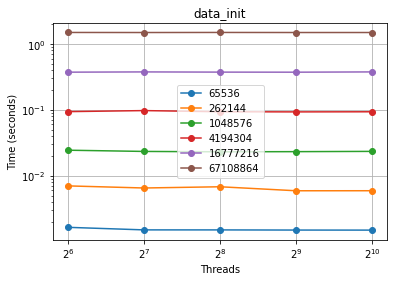

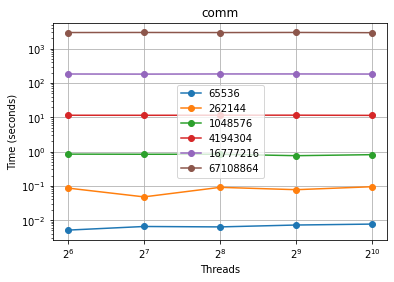

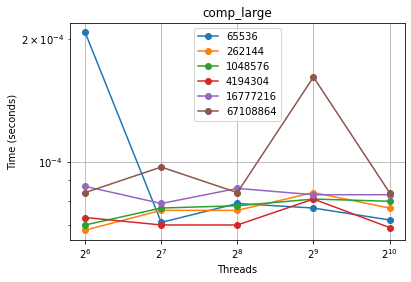

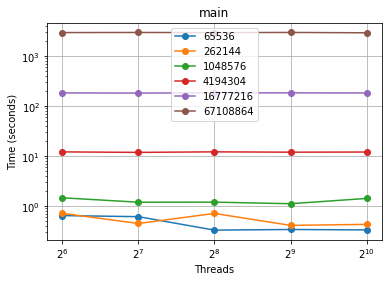

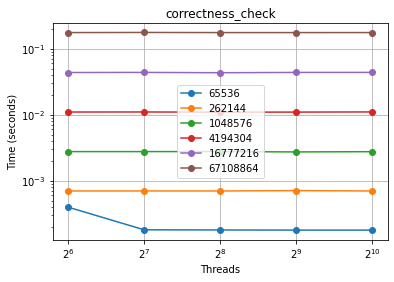

In [24]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
    )

## Speedup

In [26]:
ctk.dataframe

65536    262144   1048576    4194304  \
name              num_threads                                            
main              64           0.642092  0.712372  1.457336  12.077580   
                  128          0.610994  0.446238  1.190037  11.810903   
                  256          0.328821  0.709014  1.192982  12.101881   
                  512          0.338536  0.408878  1.109473  11.917889   
                  1024         0.332051  0.428586  1.415353  11.998971   
comm              64           0.005123  0.086054  0.840317  11.434738   
                  128          0.006536  0.047666  0.833091  11.396879   
                  256          0.006355  0.090427  0.834413  11.465029   
                  512          0.007210  0.077244  0.757204  11.481844   
                  1024         0.007678  0.094359  0.810835  11.339621   
comm_large        64           0.005046  0.086005  0.840266  11.434679   
                  128          0.006483  0.047610  0.833035  11.396828   
                  256          0.006301  0.090363  0.834356  11.464963   
                  512          0.007150  0.077186  0.757144  11.481782   
                  1024         0.007623  0.094303  0.810780  11.339571   
cudaMemcpy        64           0.004989  0.085965  0.840211  11.434611   
                  128          0.006451  0.047568  0.832987  11.396769   
                  256          0.006268  0.090317  0.834307  11.464908   
                  512          0.007115  0.077140  0.757094  11.481722   
                  1024         0.007592  0.094256  0.810719  11.339506   
comp              64           0.000240  0.000082  0.000085   0.000090   
                  128          0.000085  0.000090  0.000091   0.000086   
                  256          0.000092  0.000092  0.000093   0.000085   
                  512          0.000091  0.000100  0.000098   0.000099   
                  1024         0.000085  0.000091  0.000098   0.000084   
comp_large        64           0.000207  0.000068  0.000070   0.000073   
                  128          0.000071  0.000076  0.000077   0.000070   
                  256          0.000079  0.000076  0.000078   0.000070   
                  512          0.000077  0.000084  0.000081   0.000081   
                  1024         0.000072  0.000077  0.000080   0.000069   
correctness_check 64           0.000399  0.000701  0.002768   0.011002   
                  128          0.000181  0.000702  0.002768   0.011022   
                  256          0.000180  0.000701  0.002770   0.010953   
                  512          0.000179  0.000710  0.002736   0.010979   
                  1024         0.000179  0.000701  0.002762   0.011039   
data_init         64           0.001646  0.007009  0.024406   0.094006   
                  128          0.001505  0.006512  0.023380   0.097502   
                  256          0.001504  0.006797  0.023079   0.093628   
                  512          0.001496  0.005910  0.023202   0.093163   
                  1024         0.001493  0.005916  0.023420   0.093525   

                                 16777216     67108864  
name              num_threads                           
main              64           182.870666  2945.896275  
                  128          181.445471  2959.806924  
                  256          183.539106  2939.753842  
                  512          183.378530  2963.873032  
                  1024         182.136138  2915.969105  
comm              64           182.115315  2943.893475  
                  128          180.803069  2957.790251  
                  256          182.558967  2937.856818  
                  512          182.603219  2961.795000  
                  1024         181.387695  2913.976740  
comm_large        64           182.115258  2943.893416  
                  128          180.803013  2957.790192  
                  256          182.558912  2937.856757  
                  512          182.603159  2961.794925  
             

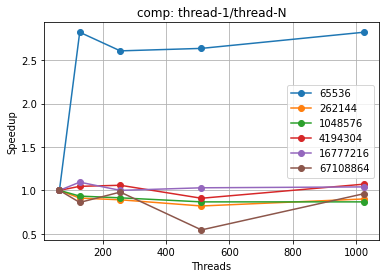

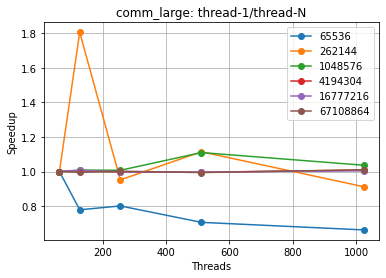

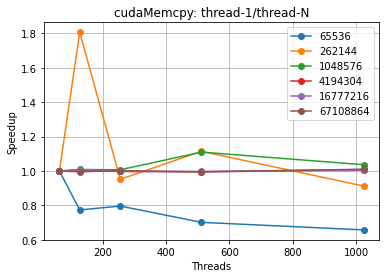

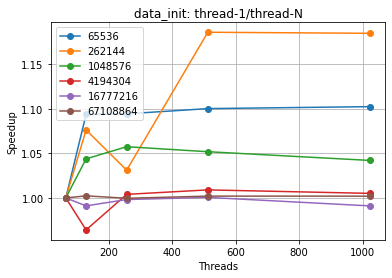

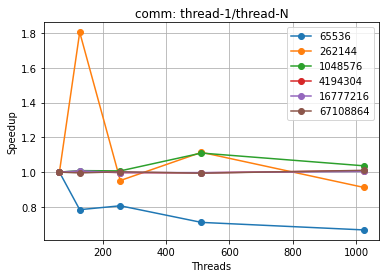

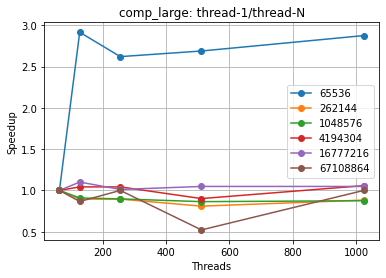

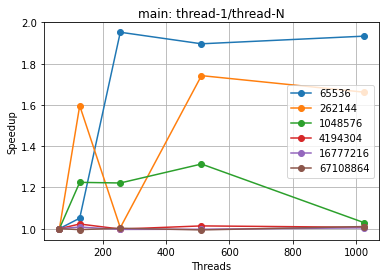

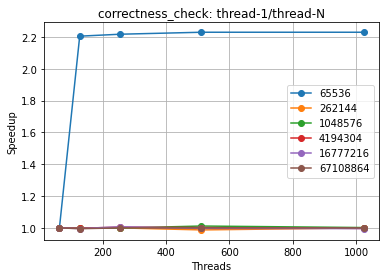

In [29]:
speedup_df = ctk.dataframe.loc[(slice(None),64), :].reset_index().drop("num_threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

In [27]:
ctk.dataframe.index

MultiIndex([(             'main',   64),
            (             'main',  128),
            (             'main',  256),
            (             'main',  512),
            (             'main', 1024),
            (             'comm',   64),
            (             'comm',  128),
            (             'comm',  256),
            (             'comm',  512),
            (             'comm', 1024),
            (       'comm_large',   64),
            (       'comm_large',  128),
            (       'comm_large',  256),
            (       'comm_large',  512),
            (       'comm_large', 1024),
            (       'cudaMemcpy',   64),
            (       'cudaMemcpy',  128),
            (       'cudaMemcpy',  256),
            (       'cudaMemcpy',  512),
            (       'cudaMemcpy', 1024),
            (             'comp',   64),
            (             'comp',  128),
            (             'comp',  256),
            (             'comp',  512),
            (   